# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

Loading the Data

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking for null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Datatype of the "Class"

In [5]:
#Changing the data type of Class

data['Class'] = data['Class'].astype('category')

#Renaming the classes
data['Class'] = data['Class'].cat.rename_categories({1:'Fraudulent',0:'valid'})

data['Class']

0         valid
1         valid
2         valid
3         valid
4         valid
          ...  
284802    valid
284803    valid
284804    valid
284805    valid
284806    valid
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['valid', 'Fraudulent']

Exploring the Dataset

In [6]:
#Getting the frequency of each class in the column
classes = data['Class'].value_counts()
#Calculating the percentages of each class
valid = data[data['Class'] == 0]
valid_share = classes[0]/data['Class'].count()*100
print('Percentage Fraud Cases: {}'.format(valid_share))
fraud = data[data['Class'] == 1]
fraud_share = classes[1]/data['Class'].count()*100
print('Percentage Valid Transactions: {}'.format(fraud_share))
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Percentage Fraud Cases: 99.82725143693798
Percentage Valid Transactions: 0.1727485630620034
Fraud Cases: 0
Valid Transactions: 0


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

In [7]:
#Creating a data for percentage of each class
class_share = {'Class':['fraudulent','valid'],'Percentage':[fraud_share,valid_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,valid,99.827251


# Data Visualization

Bar Plot

C:\Users\Mohamed Sayed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


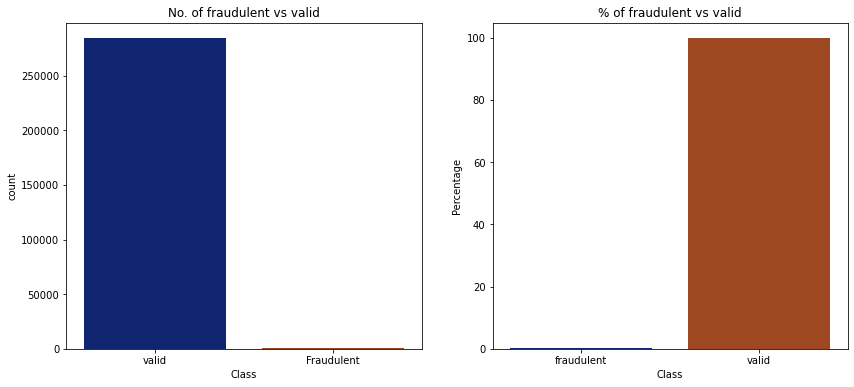

In [8]:
# Creating a bar plot for the number and percentage of fraudulent vs valid transcations

sns.set_palette("dark")

# Create a figure with two subplots
plt.figure(figsize=(14,6))

# Plot the number of fraudulent and valid transactions in the first subplot
plt.subplot(121)
sns.countplot('Class',data=data)
plt.title('No. of fraudulent vs valid')

# Plot the percentage of fraudulent and nvalid transactions in the second subplot
plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs valid')

# Show the figure with both subplots
plt.show()

Scatter Plot

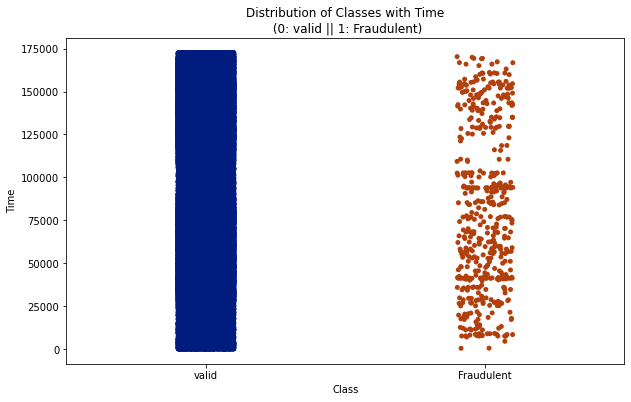

In [9]:
# Create a scatter plot for the distribution of classes over time
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=data)
plt.title('Distribution of Classes with Time\n (0: valid || 1: Fraudulent)')
plt.show()

The plot does not reveal any particular pattern or trend in the distribution of fraudulent transactions over time. Fraudulent transactions appear to occur randomly.

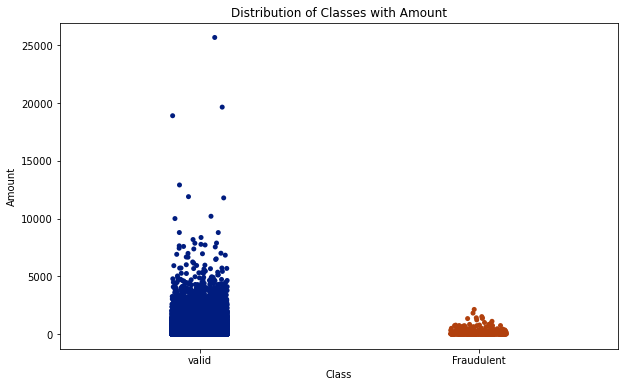

In [10]:
# Create a scatter plot for the distribution of classes over Amount paid

plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=data)
plt.title('Distribution of Classes with Amount')
plt.show()

Fraudulent transactions don't have any large amounts. The highest amount observed in the fraudulent transactions is around $2500.

# Plotting the Correlation Matrix

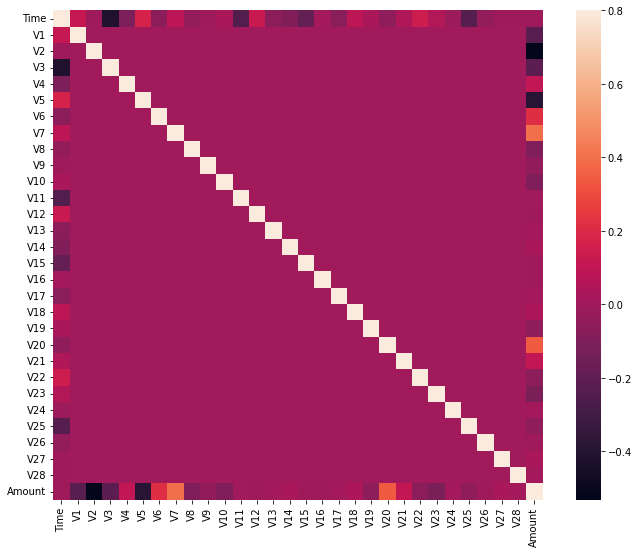

In [11]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount

In [12]:
# Dropping the column 'Time'
data=data.drop('Time',axis=1)
data.shape

(284807, 30)

# Splitting Data into test and train

In [13]:
scores = []
X = data.iloc[:,:-1]
y= data.iloc[:,-1]

In [14]:
# Split the data into training and test sets
# The stratify = y for ensuring that the proportion of classes in the train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [15]:
# Print the total count of instances for each class in the original dataset
print('Total count for each class:\n', y.value_counts())

# Print the count of instances for each class in the training set
print("\nCount of each class in train data:\n",y_train.value_counts())

# Print the count of instances for each class in the test set
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 valid         284315
Fraudulent       492
Name: Class, dtype: int64

Count of each class in train data:
 valid         227451
Fraudulent       394
Name: Class, dtype: int64

Count of each class in test data:
 valid         56864
Fraudulent       98
Name: Class, dtype: int64


# Model performance parameter

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
# Plot the Receiver Operating Characteristic (ROC) curve
def plot_roc(fpr, tpr):

    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Evaluate the performance of a classifier using the AUC score, ROC curve, and classification report
def clf_score(clf):

    # Get the predicted probabilities for the test data
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    
    # Calculate the AUC score
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    
    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label='valid')
    plot_roc(fpr, tpr)
    
    # Get the predicted labels for the test data
    predicted = clf.predict(X_test)
    
    # Generate a classification report
    report = classification_report(y_test, predicted)
    print(report)
    scores.append(auc)
    return auc

# Model Building on the imbalanced dataset

# K-Nearest Neighbors (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

AUC: 0.89


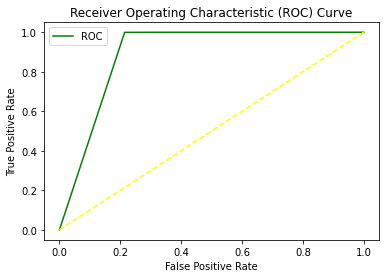

              precision    recall  f1-score   support

  Fraudulent       0.96      0.66      0.78        98
       valid       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.98      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962



0.8927597927888092

In [18]:
clf_score(knn_clf)

Visualizing the Confusion Matrix

<AxesSubplot:>

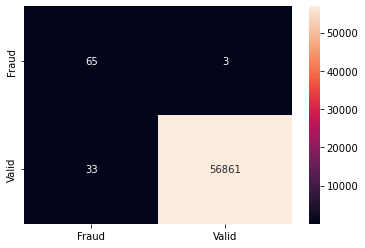

In [19]:
from sklearn.metrics import confusion_matrix
LABELS = ['Fraud', 'Valid']
matrix= confusion_matrix(y_pred_knn, y_test)
sns.heatmap(matrix, xticklabels = LABELS, yticklabels = LABELS,annot = True, fmt = "d")

# Decision Tree

In [20]:
from sklearn import tree
from pprint import pprint

In [22]:
depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9990783207882552, 0.9992889903223684, 0.9993065461168777, 0.9994294366784437, 0.9994557703702078, 0.9994821040619719, 0.9994645482674626, 0.9994513814215804, 0.9993943250894247, 0.9994162698325617, 0.9993943250894249, 0.9993109350655051, 0.9993416577058966, 0.9993328798086416, 0.9992538787333494, 0.9992758234764862, 0.9992319339902126, 0.9992758234764864, 0.9992231560929579]


C:\Users\Mohamed Sayed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


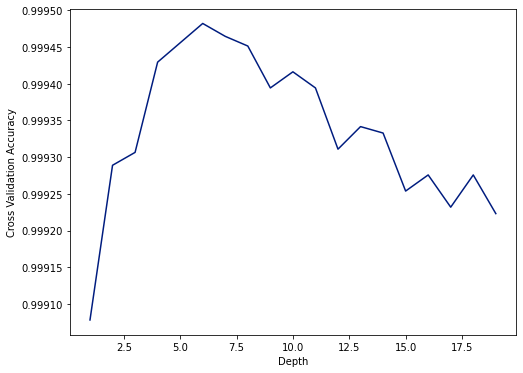

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

AUC: 0.88


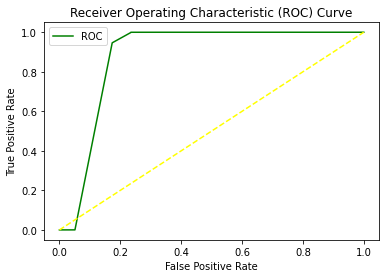

              precision    recall  f1-score   support

  Fraudulent       0.93      0.71      0.81        98
       valid       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



0.8827872876781551

In [24]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
#Plotting ROC
clf_score(dt_clf)

Visualizing the Confusion Matrix

<AxesSubplot:>

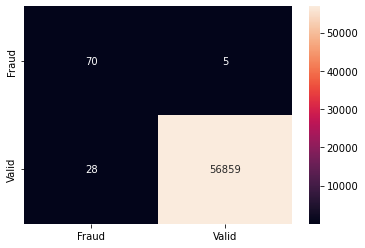

In [25]:
from sklearn.metrics import confusion_matrix
LABELS = ['Fraud', 'Valid']
matrix= confusion_matrix(y_pred_dt, y_test)
sns.heatmap(matrix, xticklabels = LABELS, yticklabels = LABELS,annot = True, fmt = "d")

# Discision Tree Visualization

In [26]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [27]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

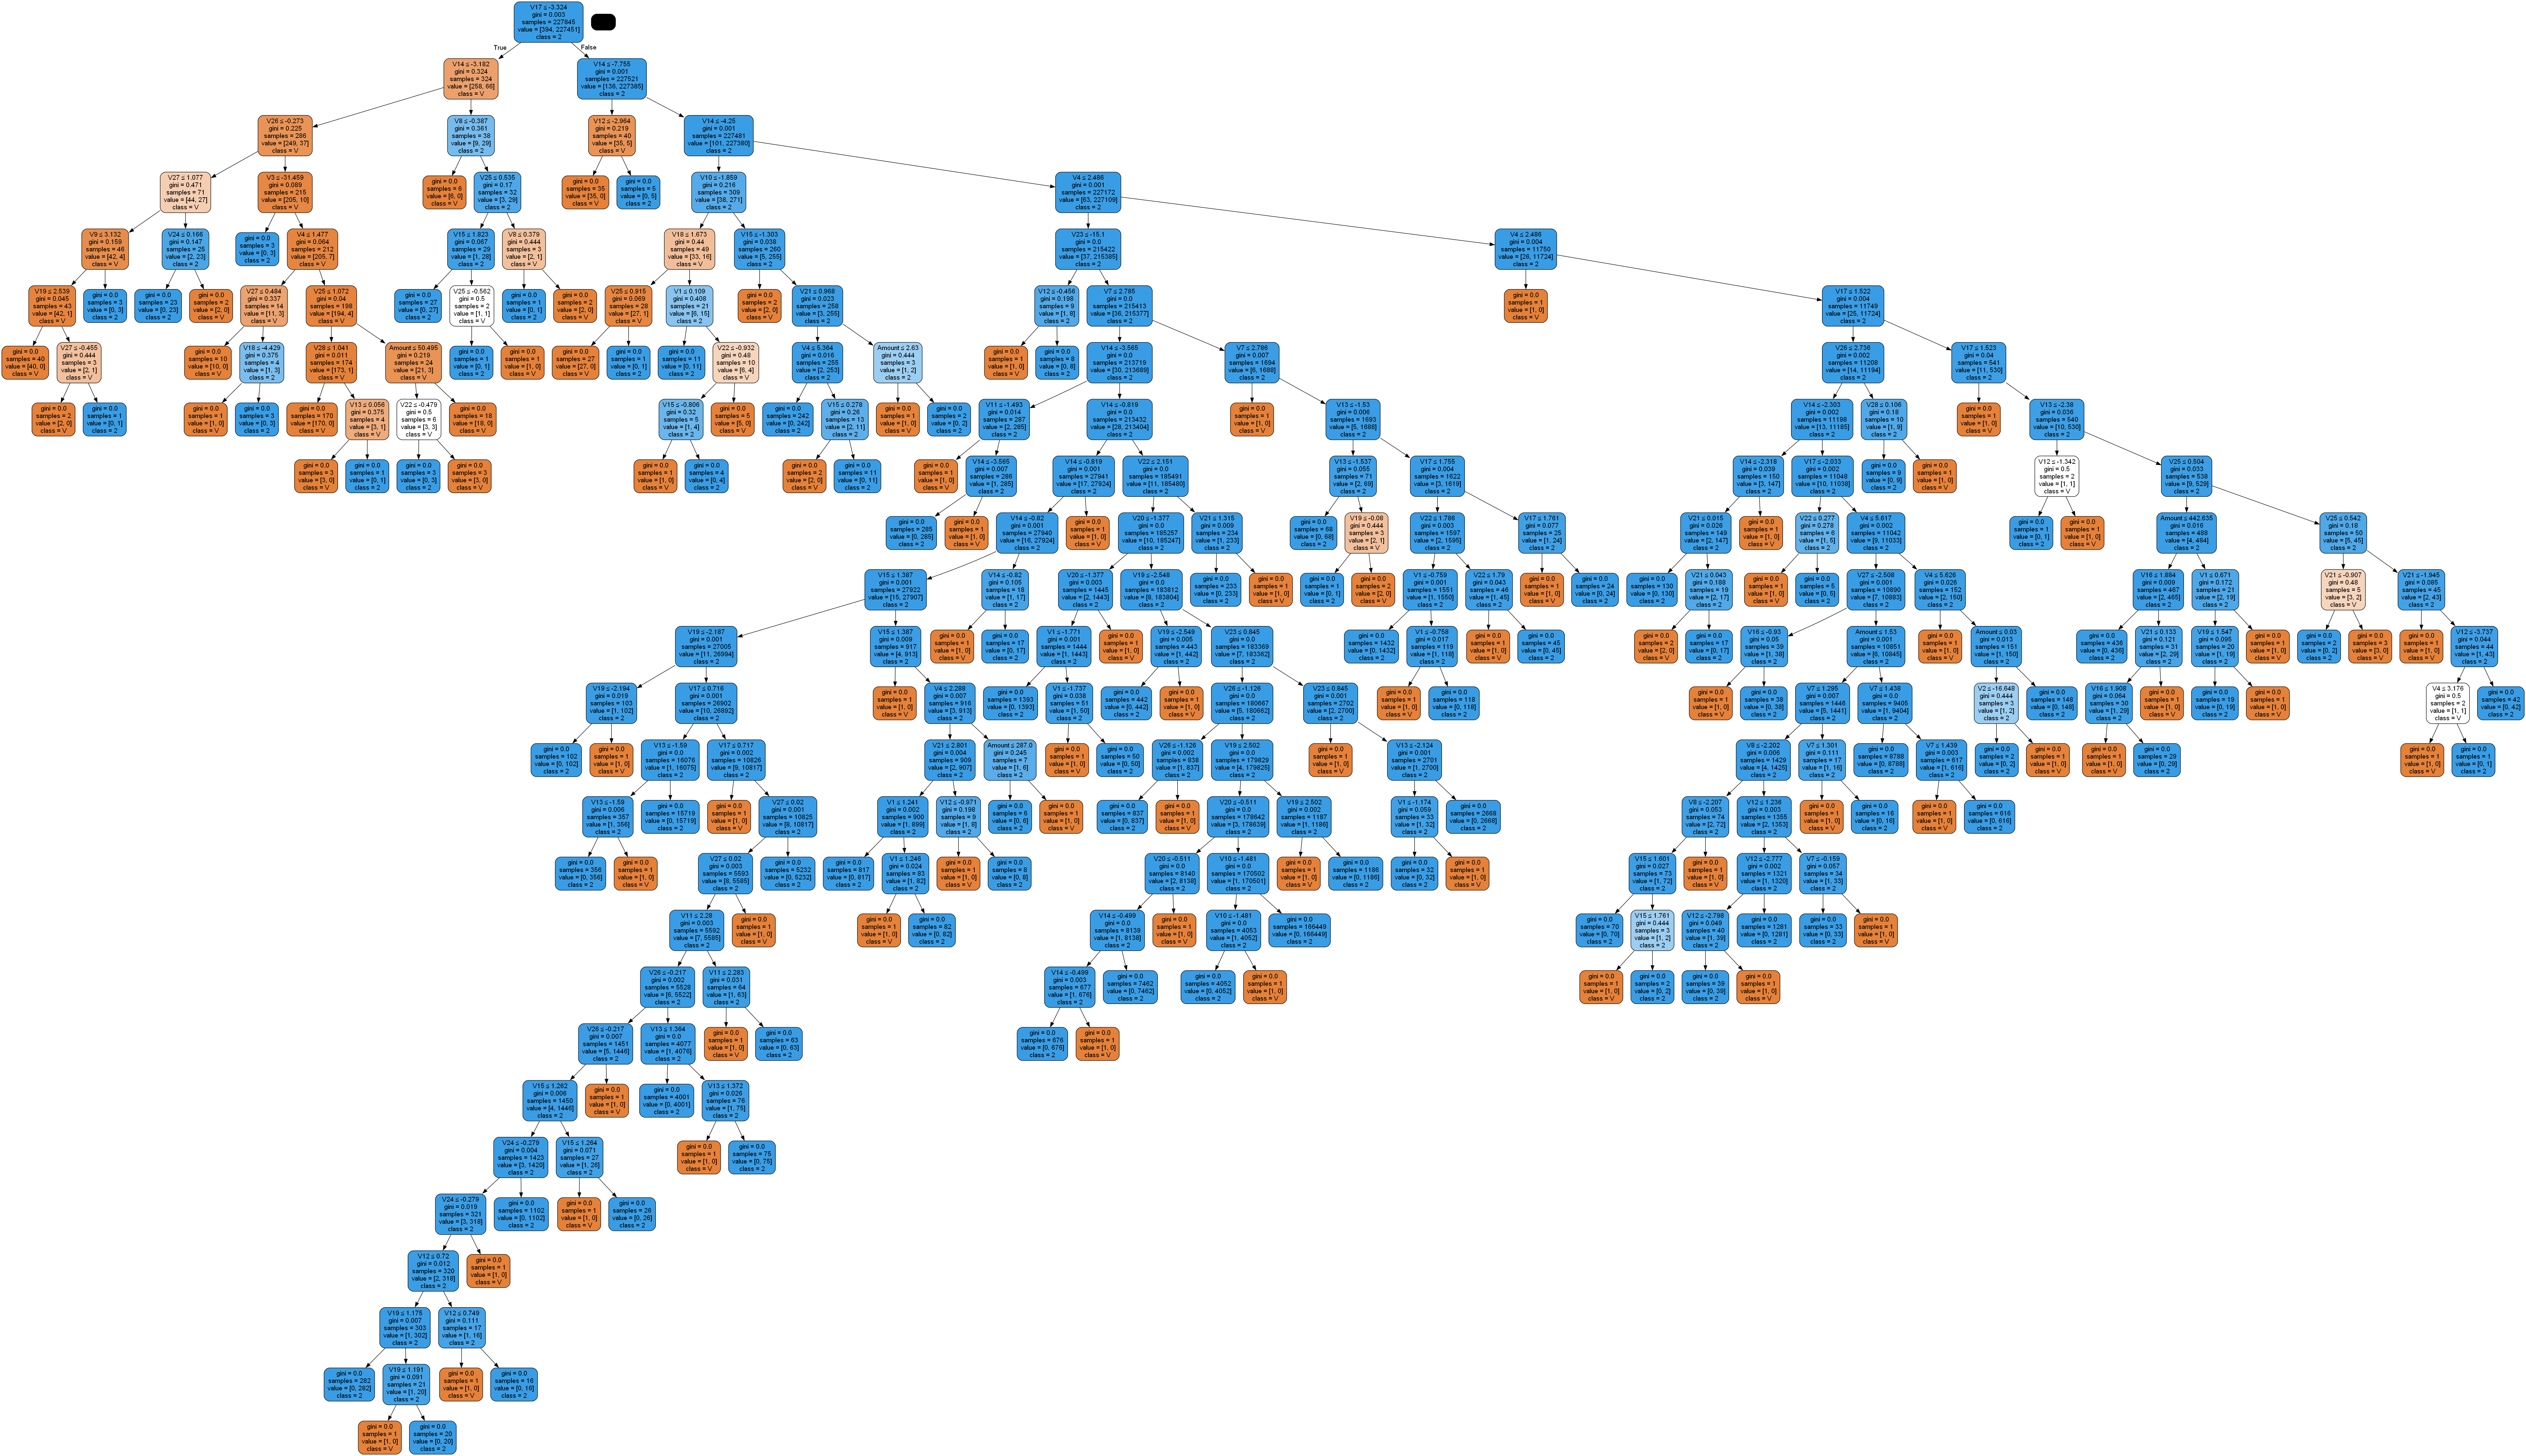

In [29]:
plot_decision_tree(clf, X_train.columns,data.columns[1])

# depth :2

In [30]:
from sklearn import tree
HOW_DEEP_TREES = 2
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=2, random_state=0)

In [31]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=2)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

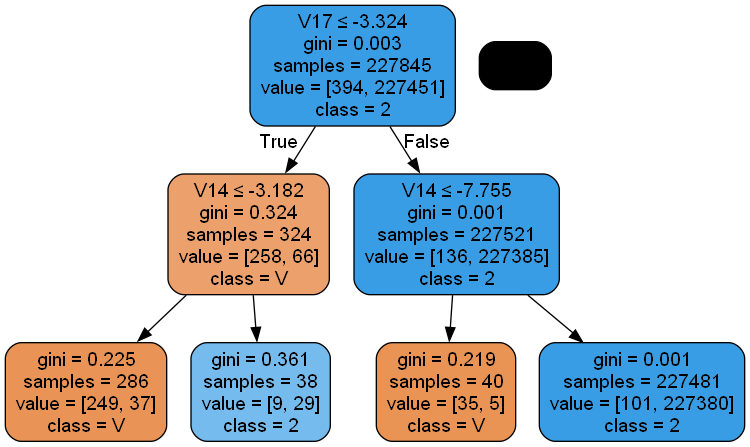

In [32]:
plot_decision_tree(clf, X_train.columns,data.columns[1])

# Random Forest

In [33]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [50, 60, 30], 'max_depth': [5,4, 3]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)
print('Training metric:\n'+ classification_report(y_train, clf_rfc_cv.best_estimator_.predict(X_train)))
print('Test metric:\n'+ classification_report(y_test, clf_rfc_cv.best_estimator_.predict(X_test)))

tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'n_estimators': 50}
accuracy : 0.9663048986651054
Training metric:
              precision    recall  f1-score   support

  Fraudulent       0.97      0.76      0.85       394
       valid       1.00      1.00      1.00    227451

    accuracy                           1.00    227845
   macro avg       0.98      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845

Test metric:
              precision    recall  f1-score   support

  Fraudulent       0.96      0.67      0.79        98
       valid       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.98      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962



AUC: 0.96


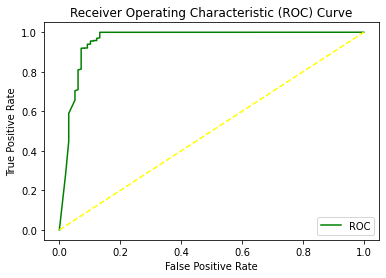

              precision    recall  f1-score   support

  Fraudulent       0.96      0.67      0.79        98
       valid       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.98      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962



0.9599235339887221

In [35]:
clf_score(clf_rfc_cv)

<AxesSubplot:>

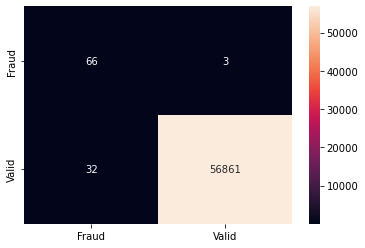

In [36]:
from sklearn.metrics import confusion_matrix
y_pred_rfc = clf_rfc_cv.predict(X_test)
LABELS = ['Fraud', 'Valid']
matrix= confusion_matrix(y_pred_rfc, y_test)
sns.heatmap(matrix, xticklabels = LABELS, yticklabels = LABELS,annot = True, fmt = "d")

# Final Score 

In [39]:
# create a dataframe from accuracy results
classifiers = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
summary = pd.DataFrame({'accuracy':scores}, index=classifiers)       
summary

,accuracy
K-Nearest Neighbors,0.892760
Decision Tree,0.882787
Random Forest,0.959924


C:\Users\Mohamed Sayed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

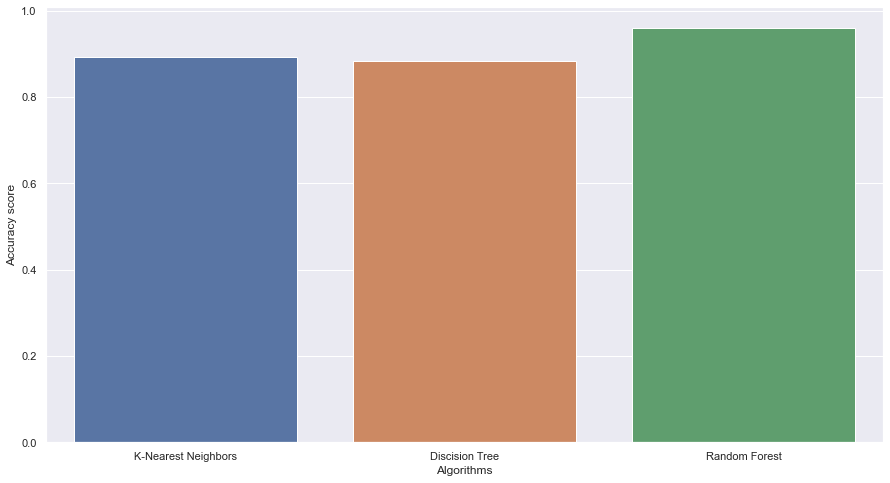

In [40]:
algorithms = ["K-Nearest Neighbors","Discision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# From the previos results we will find that Random Forest algorithm has the best results of them on the unbalanced dataset.

# Class Imbalance Handling By Smote

Reference: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [41]:
#importing SMOTE

from imblearn.over_sampling import SMOTE
scores_sm = [] 
sm = SMOTE()
Xt_sm, yt_sm = sm.fit_resample(X_train, y_train)
Xe_sm, ye_sm = sm.fit_resample(X_test, y_test)

In [42]:
#CHecking shape and class count after smote
from collections import Counter

print('Resampled dataset shape %s' % Counter(yt_sm))
print(Xt_sm.shape)
print(yt_sm.shape)

Resampled dataset shape Counter({'valid': 227451, 'Fraudulent': 227451})
(454902, 29)
(454902,)


In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
# Plot the Receiver Operating Characteristic (ROC) curve
def plot_roc(fpr, tpr):

    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Evaluate the performance of a classifier using the AUC score, ROC curve, and classification report
def clf_score(clf):

    # Get the predicted probabilities for the test data
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    
    # Calculate the AUC score
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    
    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label='valid')
    plot_roc(fpr, tpr)
    
    # Get the predicted labels for the test data
    predicted = clf.predict(X_test)
    
    # Generate a classification report
    report = classification_report(y_test, predicted)
    print(report)
    scores_sm.append(auc)
    return auc

# K-Nearest Neighbors (KNN) on SMOTE

AUC: 0.94


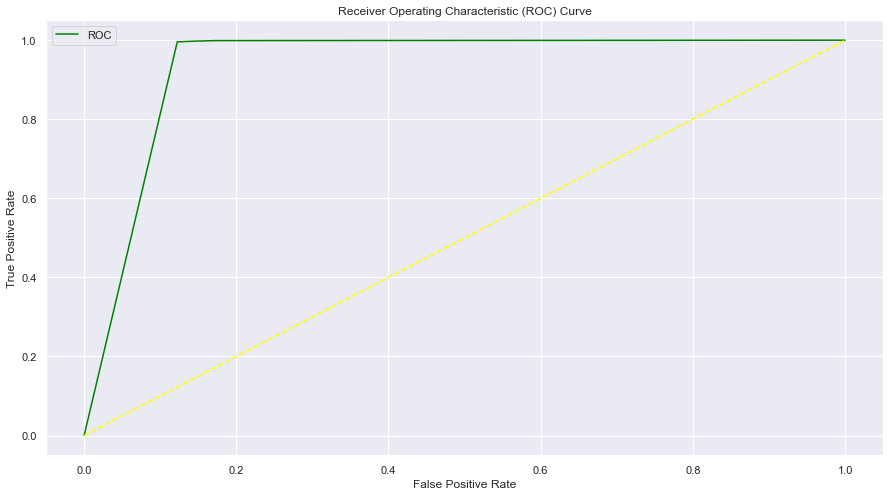

              precision    recall  f1-score   support

  Fraudulent       0.37      0.86      0.52        98
       valid       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.68      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962



0.9379597435485169

In [44]:
# KNN with SMOTE re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_sm = knn.fit(Xt_sm,yt_sm)

#Printing ROC 

clf_score(knn_sm)

<AxesSubplot:>

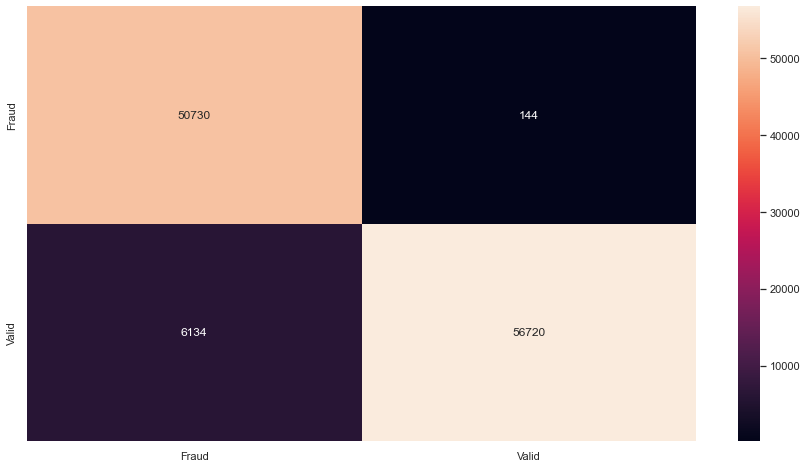

In [45]:
from sklearn.metrics import confusion_matrix
y_pred_knnsm = knn_sm.predict(Xe_sm)
LABELS = ['Fraud', 'Valid']
matrix= confusion_matrix(y_pred_knnsm, ye_sm)
sns.heatmap(matrix, xticklabels = LABELS, yticklabels = LABELS,annot = True, fmt = "d")

# Decision Tree on Smote

AUC: 0.97


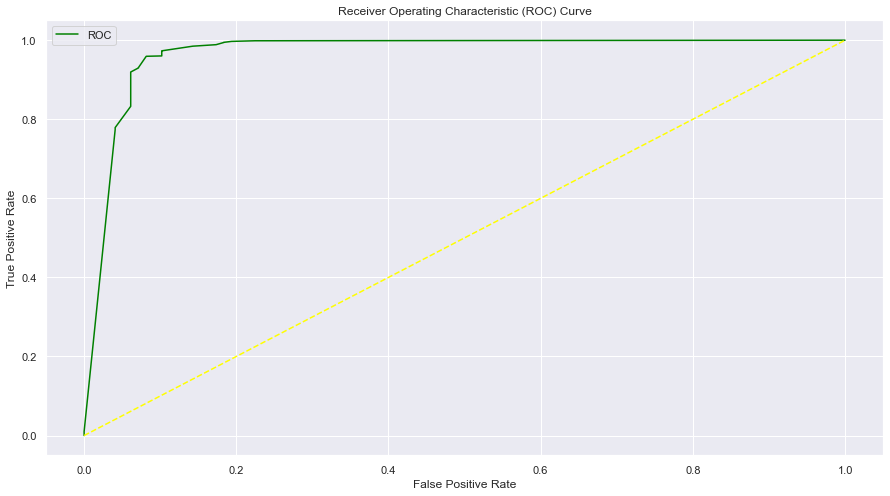

              precision    recall  f1-score   support

  Fraudulent       0.05      0.90      0.09        98
       valid       1.00      0.97      0.98     56864

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



0.9670378052036797

In [46]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_sm = dt.fit(Xt_sm,yt_sm)

#Plotting ROC
clf_score(dt_sm)

<AxesSubplot:>

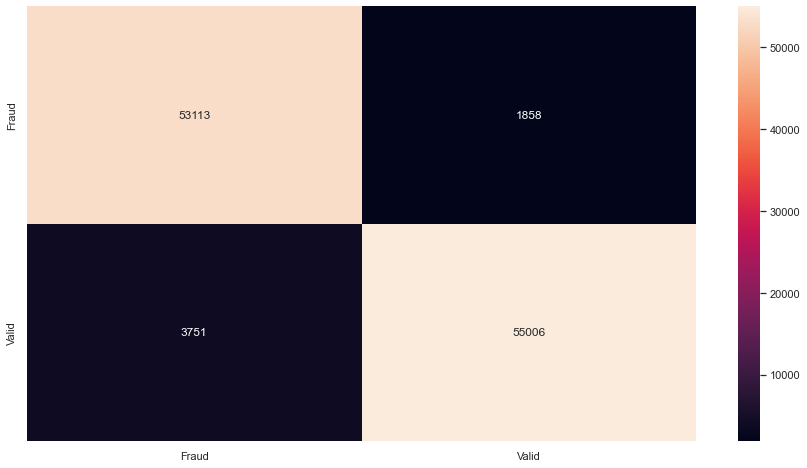

In [47]:
from sklearn.metrics import confusion_matrix
y_pred_dtsm = dt_sm.predict(Xe_sm)
LABELS = ['Fraud', 'Valid']
matrix= confusion_matrix(y_pred_dtsm, ye_sm)
sns.heatmap(matrix, xticklabels = LABELS, yticklabels = LABELS,annot = True, fmt = "d")

# Random Forest on SMOTE


AUC: 0.98


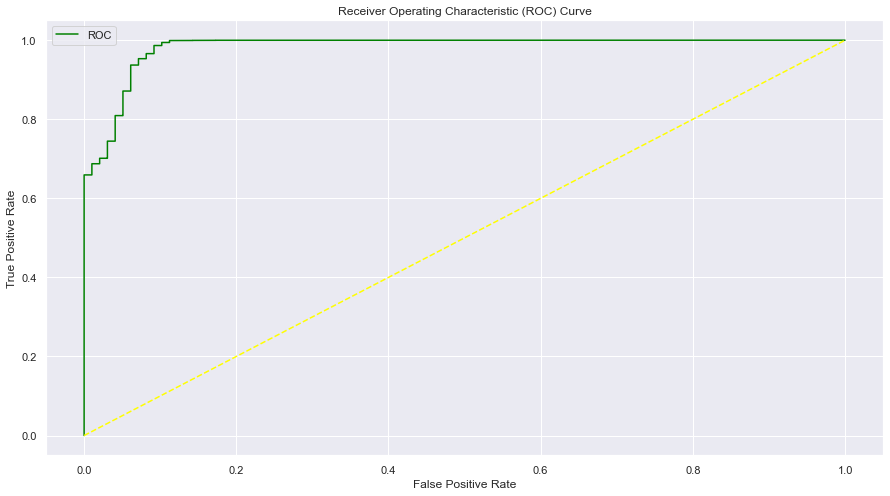

              precision    recall  f1-score   support

  Fraudulent       0.53      0.89      0.66        98
       valid       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962



0.982638669564618

In [48]:
#Building Random forest with best parameters on SMOTE
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_sm = rf.fit(Xt_sm,yt_sm)

#Plotting ROC
clf_score(RFC_sm)

<AxesSubplot:>

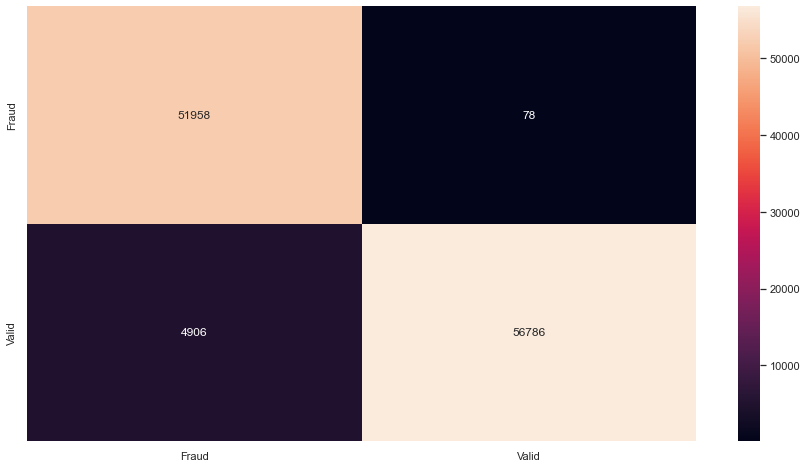

In [49]:
from sklearn.metrics import confusion_matrix
y_pred_RFC_sm = RFC_sm.predict(Xe_sm)
LABELS = ['Fraud', 'Valid']
matrix= confusion_matrix(y_pred_RFC_sm, ye_sm)
sns.heatmap(matrix, xticklabels = LABELS, yticklabels = LABELS,annot = True, fmt = "d")

# Final Score 

In [50]:
# create a dataframe from accuracy results
classifiers = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
summary = pd.DataFrame({'accuracy':scores_sm}, index=classifiers)       
summary

,accuracy
K-Nearest Neighbors,0.937960
Decision Tree,0.967038
Random Forest,0.982639


C:\Users\Mohamed Sayed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

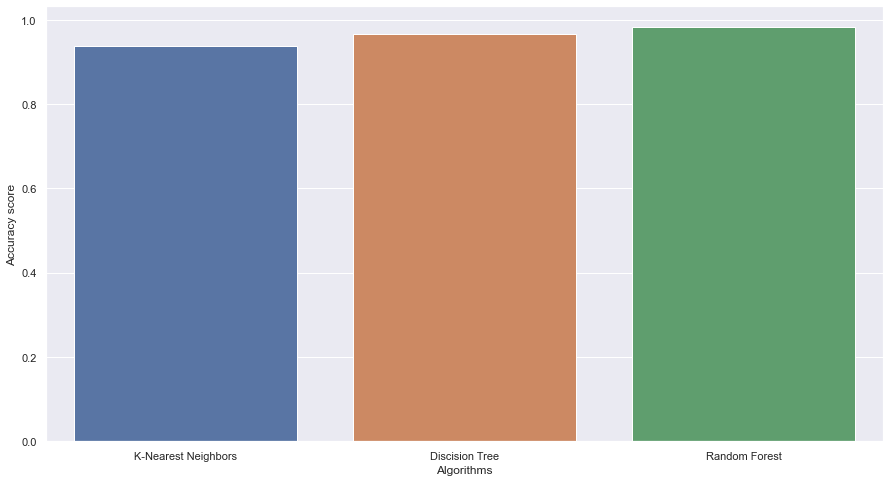

In [51]:
algorithms = ["K-Nearest Neighbors","Discision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores_sm)

# After Applying Smote to balance the dataset we will find that Random Forest has the heighst Accuracy score Among the other algorithms.